# DS4023 Machine Learning : Logistic Regression Exercise

## Introduction
In this exercise, you will implement logistic regression and apply it to two diﬀerent datasets. 

### 1. Logistic Regression 
You will build a logistic regression model to predict whether a student gets admitted into a university. Suppose that you are the administrator of a university department and you want to determine each applicant’s chance of admission based on their results on two exams. You have historical data from previous applicants that you can use as a training set for logistic regression. For each training example, you have the applicant’s scores on two exams and the admissions decision. Your task is to build a classiﬁcation model that estimates an applicant’s probability of admission based the scores from those two exams.

### 1.1 Visualizing the data
Before starting to implement any learning algorithm, it is always good to visualize the data if possible.

First, let's import necessary libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Second, let's read the data in from the data file.

In [2]:
path = 'ex2data1.txt'
data = pd.read_csv(path, names = ['Exam1', 'Exam2', 'Admitted'])  # fill your code here
data.head()

,Exam1,Exam2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


You will now complete the code in below so that it displays a scatter ﬁgure with X and Y axis to be the scores of the students, use color of each point to indicate whether a student is admitted or not.

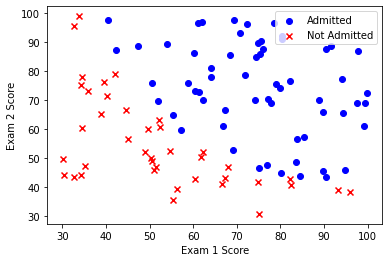

In [3]:
# code here to plot a scatter figure to visualize the data as follows
cls1 = data[data['Admitted'] == 1]
cls2 = data[data['Admitted'] == 0]
# draw scatter plot respectively.
plt.scatter(cls1['Exam1'], cls1['Exam2'],  c = 'blue', marker = 'o', label = 'Admitted')
plt.scatter(cls2['Exam1'], cls2['Exam2'], c = 'red', marker = 'x', label = 'Not Admitted')
# # set the size of plot.
# plt.figure(figsize = (12, 8))
# set label of the plot.
plt.xlabel('Exam 1 Score')
plt.ylabel('Exam 2 Score')
# set index of plot.
plt.legend(('Admitted', 'Not Admitted'), loc = 'upper right')
# show final plot.
plt.show()

Looks like there is a clear boundary between two classes, so let's try to implement a logistic regression classifier to do the job。

### 1.2 Implementation of logistic regression
### 1.2.1 sigmoid 函数
Before you start with the actual cost function, recall that the sigmoid function looks like this:
\\[g\left( z \right)=\frac{1}{1+{{e}^{-z}}}\\] 
the logistic regression hypothesis is deﬁned as： 
	\\[{{h}_{\theta }}\left( x \right)=\frac{1}{1+{{e}^{-{{\theta }^{T}}X}}}\\] 
Please implement the sigmoid function in below

In [4]:
#code here to implement the sigmoid function
# import math
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

Plot the function below to verify if it is correct:

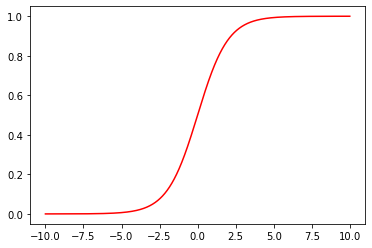

In [5]:
#code here to plot the sigmoid function
z = np.linspace(-10, 10, 10000)
s = sigmoid(z)
plt.plot(z, s, color = 'red')
plt.show()

### 1.2.2 Cost function and gradient
Now you will implement the cost function and gradient for logistic regression.：
\\[J\left( \theta  \right)=\frac{1}{m}\sum\limits_{i=1}^{m}{[-{{y}^{(i)}}\log \left( {{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)-\left( 1-{{y}^{(i)}} \right)\log \left( 1-{{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)]}\\]

In [6]:
#code here to implement the above cost function
def cost(theta, X, y):
    ''' cost function for you to minimize'''
    sum_val = 0
    m = X.shape[0]
    for i in range(X.shape[0]):
        term1 = - y[i] * np.log(sigmoid(np.dot(X[i], theta)))
        term2 = - (1 - y[i]) * np.log(1 - sigmoid(np.dot(X[i], theta)))
        sum_val += term1 + term2
    return float((1/m) * sum_val)

Data initialization, Similar to what you did in linear regress exercise:

In [7]:
# add a ones column - this makes the matrix multiplication work out easier
data.insert(0, 'Ones', 1)

# set X (training data) and y (target variable)

X = np.array(data[['Ones', 'Exam1', 'Exam2']])
y = data.iloc[:, -1]
# y = np.array(data[['Admitted']])
#initialize theta with 0s

theta = np.zeros(X.shape[1])

Check if the dimensions of data are correct

In [8]:
theta

array([0., 0., 0.])

In [9]:
X.shape, theta.shape, y.shape

((100, 3), (3,), (100,))

Calculate the initial cost function value:

In [10]:
cost(theta, X, y)

0.693147180559946

### gradient descent(梯度下降)
* we are going to use batch gradient descent）  
* implement the gradient function of each parameter using vector calculations： $\frac{1}{m} X^T( Sigmoid(X\theta) - y )$
$$\frac{\partial J\left( \theta  \right)}{\partial {{\theta }_{j}}}=\frac{1}{m}\sum\limits_{i=1}^{m}{({{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}})x_{_{j}}^{(i)}}$$

In [11]:
#code here to implement the above gradient function
def gradient(theta, X, y):
    # m = X.shape[0]
    m = len(y)
    s_val = sigmoid(np.dot(X, theta)) - y
    # return np.array((1/m) * np.dot(X.T, s_val))[:, 0]
    return np.array((1/m) * np.dot(X.T, s_val))

Note that up to now we have just implemented the gradient at each step, we haven't done the gradient descent to find the minimal cost function.
We will do it using some optimization functions in the Scipy optimize library.

Show the gradient value under the initial theta value:

In [13]:
gradient(theta, X, y)

array([ -0.1       , -12.00921659, -11.26284221])

Now we can use several different optimization functions in the Scipy optimize library to find the best theta:

- [scipy.optimize.minimize](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html#scipy.optimize.minimize)


In [14]:
import scipy.optimize as opt

In [15]:
# fill in the correct arguments in the opt.minimize function
# init_theta = np.array([0, 0, 0])
result = opt.minimize(cost, x0 = theta, args = (X, y), method = 'Nelder-Mead', jac = gradient)  #fill in correct arguments here)
result
# method = 'Nelder-Mead'

/Users/wendywang/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_minimize.py:522: RuntimeWarning: Method Nelder-Mead does not use gradient information (jac).
  warn('Method %s does not use gradient information (jac).' % method,


 final_simplex: (array([[-25.16130062,   0.20623142,   0.20147143],
       [-25.16135807,   0.20623176,   0.20147199],
       [-25.1613519 ,   0.20623203,   0.20147171],
       [-25.16137971,   0.20623202,   0.20147188]]), array([0.2034977, 0.2034977, 0.2034977, 0.2034977]))
           fun: 0.20349770159021519
       message: 'Optimization terminated successfully.'
          nfev: 287
           nit: 157
        status: 0
       success: True
             x: array([-25.16130062,   0.20623142,   0.20147143])

Let's check what is the cost value with our optimized resutl

In [16]:
cost(result.x, X, y)

0.20349770159021519

### 1.3 Predcition and verification with training dataset
After learning the parameters, you can use the model to predict whether a particular student will be admitted. To evaluate the quality of the parameters we have found, we can calculate how well the learned model predicts on our training set 
	\\[{{h}_{\theta }}\left( x \right)=\frac{1}{1+{{e}^{-{{\theta }^{T}}X}}}\\] 
Your task is to complete the code in predict funcition so that will produce “1” or “0” predictions given a dataset and a learned parameter vector \theta

When ${{h}_{\theta }}>= 0.5$,  y=1

When ${{h}_{\theta }}< 0.5$，y=0

In [17]:
# complete the code to apply your model for prediction
def predict(theta, X):
    probability = np.zeros(X.shape[0])
    for i in range(X.shape[0]):
        probability[i] = sigmoid(np.dot(X[i], theta))  # your code goes here
    return (probability >= 0.5).astype(int)

Calculate the performance result:

In [18]:
#complete the codes here
from sklearn.metrics import classification_report  # this is a convinient function to show the classification performance

theta_min = result.x
y_pred = predict(theta_min, X)
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86        40
           1       0.90      0.92      0.91        60

    accuracy                           0.89       100
   macro avg       0.89      0.88      0.88       100
weighted avg       0.89      0.89      0.89       100



Note that this is the performance on training data only, seems not bad, but the real performance might be worse.

### 1.4 finding and visualizing the decision boundary

To find the decision boundary in this dataset, it means to draw a line in the (exam1 score, exame2 score) plane. To be more specific, we need to find the $X$, so that $X \times \theta_{opt} = 0$

In [19]:
#the optimal theta has been found in section 1.2.3 already, it is theta_min, let's have a look
print(theta_min)

[-25.16130062   0.20623142   0.20147143]


Now let's draw the line that represent the equation $X \times \theta_{opt} = 0$, which is:
$\theta_0+x_1*\theta_1+x_2*\theta_2=0$, so we have the line $x_2 = -(\theta_0/\theta_2+x_1*\theta_1/\theta_2)$

/Users/wendywang/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/wendywang/opt/anaconda3/lib/python3.9/site-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


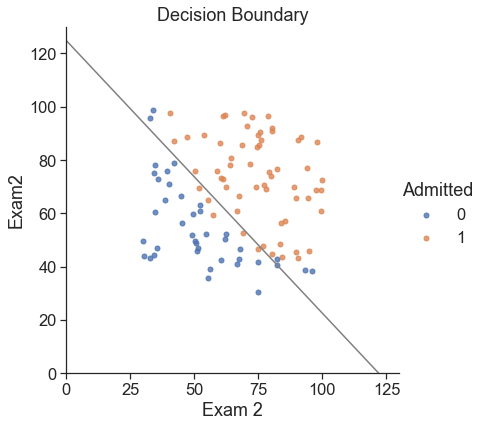

In [20]:
#complete the code below
# coef = np.dot(X, theta_min)  # find the equation

# x1 = np.linspace(0, theta_min[0]/(-theta_min[1]), 100)
# x1 = data['Exam1']
x1 = np.linspace(0, 125, 1000)
x2 = - ((theta_min[0] / theta_min[2]) + x1 * (theta_min[1] / theta_min[2]))

sns.set(context="notebook", style="ticks", font_scale=1.5)

sns.lmplot('Exam1', 'Exam2', hue='Admitted', data=data, 
           size=6, 
           fit_reg=False, 
           scatter_kws={"s": 25}
          )

plt.plot(x1, x2, 'grey')
plt.xlim(0, 130)
plt.ylim(0, 130)
plt.xlabel('Exam 1')
plt.xlabel('Exam 2')
plt.title('Decision Boundary')
plt.show()

### 2.Regularized logistic regression


In this part of the exercise, you will implement regularized logistic regression to predict whether microchips(芯片) from a fabrication plant（晶圆厂、半导体制造厂） passes quality assurance (QA). During QA, each microchip goes through various tests to ensure it is functioning correctly. Suppose you are the product manager of the factory and you have the test results for some microchips on two diﬀerent tests. From these two tests, you would like to determine whether the microchips should be accepted or rejected. To help you make the decision, you have a dataset of test results on past microchips, from which you can build a logistic regression model.

### 2.1 Visualizing the data

In [21]:
#read the data 

path =  'ex2data2.txt'
data2 = pd.read_csv(path, names = ['Test1', 'Test2', 'Accepted'])  # fill your code here
data2.head()

,Test1,Test2,Accepted
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


Similar to the previous parts of this exercise, plotData is used to generate a ﬁgure like below, where the axes are the two test scores, and the positive (y = 1, accepted) and negative (y = 0, rejected) examples are shown with diﬀerent markers.


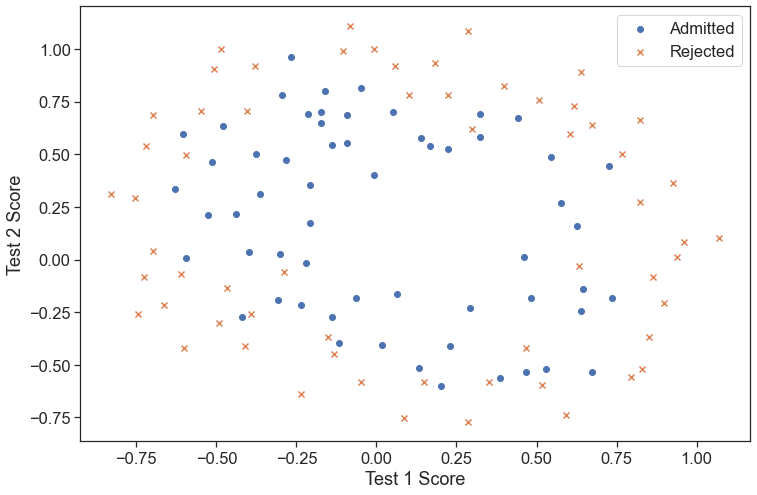

In [22]:
#visualize the data
cls1 = data2[data2['Accepted'] == 1]
cls2 = data2[data2['Accepted'] == 0]
plt.figure(figsize = (12, 8))
plt.scatter(cls1['Test1'], cls1['Test2'], marker = 'o', label = 'Accepted')
plt.scatter(cls2['Test1'], cls2['Test2'], marker = 'x', label = 'Rejected')
plt.xlabel('Test 1 Score')
plt.ylabel('Test 2 Score')
plt.legend(('Admitted', 'Rejected'), loc = 'upper right')
plt.show()

Figure above shows that our dataset cannot be separated into positive and negative examples by a straight-line through the plot. Therefore, a straightforward application of logistic regression will not perform well on this dataset since logistic regression will only be able to ﬁnd a linear decision boundary.


### 2.2 Feature mapping
One way to ﬁt the data better is to create more features from each data point. We will map the features into all polynomial terms of x1 and x2 up to the sixth power.

polynomial expansion

```
for i in 0..i
  for p in 0..i:
    output x^(i-p) * y^p
```
<img style="float: left;" src="mapped_feature.png">

In [23]:
def feature_mapping(x, y, power):
#     """return mapped features as ndarray or dataframe"""
    # res_df = pd.DataFrame()
    # res_df_item = pd.DataFrame()
    res = []
    label = []
    for i in range(power+1):
        for p in range(power+1):
            if((p+i) > 6):
                continue
            label.append('f'+str(i)+str(p))
            # calculate each item values, save to res_df_item.
            res.append(pow(x, i) * pow(y, p))
    # add row data into res_df.
    # res_df.loc[len(res_df.index)] = [val1, val2, ...]
    return pd.DataFrame(np.array(res).T, columns = label)

In [24]:
x1 = data2['Test1']
x2 = data2['Test2']

In [25]:
data = feature_mapping(x1, x2, power=6)
print(data.shape)
data.head()

(118, 28)


,f00,f01,f02,f03,f04,f05,f06,f10,f11,f12,...,f30,f31,f32,f33,f40,f41,f42,f50,f51,f60
0,1.0,0.69956,0.489384,0.342354,0.239497,0.167542,0.117206,0.051267,0.035864,0.025089,...,0.000135,0.000094,0.000066,0.000046,0.000007,0.000005,0.000003,3.541519e-07,2.477505e-07,1.815630e-08
1,1.0,0.68494,0.469143,0.321335,0.220095,0.150752,0.103256,-0.092742,-0.063523,-0.043509,...,-0.000798,-0.000546,-0.000374,-0.000256,0.000074,0.000051,0.000035,-6.860919e-06,-4.699318e-06,6.362953e-07
2,1.0,0.69225,0.479210,0.331733,0.229642,0.158970,0.110047,-0.213710,-0.147941,-0.102412,...,-0.009761,-0.006757,-0.004677,-0.003238,0.002086,0.001444,0.001000,-4.457837e-04,-3.085938e-04,9.526844e-05
3,1.0,0.50219,0.252195,0.126650,0.063602,0.031940,0.016040,-0.375000,-0.188321,-0.094573,...,-0.052734,-0.026483,-0.013299,-0.006679,0.019775,0.009931,0.004987,-7.415771e-03,-3.724126e-03,2.780914e-03
4,1.0,0.46564,0.216821,0.100960,0.047011,0.021890,0.010193,-0.513250,-0.238990,-0.111283,...,-0.135203,-0.062956,-0.029315,-0.013650,0.069393,0.032312,0.015046,-3.561597e-02,-1.658422e-02,1.827990e-02


As a result of this mapping, our vector of two features (the scores on two QA tests) has been transformed into a 28-dimensional vector. A logistic regression classiﬁer trained on this higher-dimension feature vector will have a more complex decision boundary and will appear nonlinear when drawn in our 2-dimensional plot. While the feature mapping allows us to build a more expressive classiﬁer, it also more susceptible to overﬁtting. In the next parts of the exercise, you will implement regularized logistic regression to ﬁt the data and also see for yourself how regularization can help combat the overﬁtting problem.


### 2.3 regularized cost and  gradient

Now you will implement code to compute the cost function and gradient for regularized logistic regression. Recall that the regularized cost function in logistic regression is

$$J\left( \theta  \right)=\frac{1}{m}\sum\limits_{i=1}^{m}{[-{{y}^{(i)}}\log \left( {{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)-\left( 1-{{y}^{(i)}} \right)\log \left( 1-{{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)]}+\frac{\lambda }{2m}\sum\limits_{j=1}^{n}{\theta _{j}^{2}}$$

Note that you should not regularize the parameter $\theta_0$

In [26]:
X = np.array(feature_mapping(x1, x2, power = 6))   #complete the arguments here)
print(X.shape)

theta = np.zeros(X.shape[1])
print(theta.shape)

# y = np.array(data2['Accepted'])
y = np.array(data2.iloc[:, -1])
print(y.shape)
print(y)

(118, 28)
(28,)
(118,)
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0]


In [27]:
#complete the code for calculating the regularized cost here
def regularized_cost(theta, X, y, l = 1):
    #     '''you don't penalize theta_0'''
    m = X.shape[0]
    # m = y.size
    theta_j1_to_n = theta[1: ]
    regularized_term = l * (1/(2 * m)) * np.dot(theta_j1_to_n, theta_j1_to_n.T)
    # regularized_term = l * 1/(2*m) * sum(pow(theta_j1_to_n, 2)) # your code here
    return cost(theta, X, y) + regularized_term

Check the initial regularized cost

In [28]:
regularized_cost(theta, X, y, l=1)

0.6931471805599461

Note that you should not regularize the parameter $\theta_0$：
\begin{align}
  & Repeat\text{ }until\text{ }convergence\text{ }\!\!\{\!\!\text{ } \\ 
 & \text{     }{{\theta }_{0}}:={{\theta }_{0}}-a\frac{1}{m}\sum\limits_{i=1}^{m}{[{{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}}]x_{_{0}}^{(i)}} \\ 
 & \text{     }{{\theta }_{j}}:={{\theta }_{j}}-a\frac{1}{m}\sum\limits_{i=1}^{m}{[{{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}}]x_{j}^{(i)}}+\frac{\lambda }{m}{{\theta }_{j}} \\ 
 & \text{          }\!\!\}\!\!\text{ } \\ 
 & Repeat \\ 
\end{align}

Calculate the gradient:


In [29]:
#complete the code for calculating the regularized gradient here
def regularized_gradient(theta, X, y, reg_lambda=1):
    #     '''still, leave theta_0 alone'''
    gradient_term = gradient(theta, X, y)
    regular_term = np.array([0] + [reg_lambda/len(X)] * (len(theta)- 1)) * theta
    return gradient_term + regular_term

Check the initial regularized gradient vector

In [30]:
regularized_gradient(theta, X, y)

array([8.47457627e-03, 7.77711864e-05, 3.76648474e-02, 2.34764889e-02,
       3.93028171e-02, 3.10079849e-02, 3.87936363e-02, 1.87880932e-02,
       1.15013308e-02, 8.19244468e-03, 3.09593720e-03, 4.47629067e-03,
       1.37646175e-03, 5.03446395e-02, 7.32393391e-03, 1.28600503e-02,
       5.83822078e-03, 7.26504316e-03, 1.83559872e-02, 2.23923907e-03,
       3.38643902e-03, 4.08503006e-04, 3.93486234e-02, 4.32983232e-03,
       6.31570797e-03, 1.99707467e-02, 1.09740238e-03, 3.10312442e-02])

### 2.3 Optimization: similar to what you did without regularization

In [31]:
import scipy.optimize as opt

In [32]:
#code here to implement the optimization
init_cost = regularized_cost(theta, X, y, 1)
print('init cost = ' + str(init_cost))
res = opt.minimize(fun = regularized_cost, x0 = theta, args = (X, y), jac = regularized_gradient, method = 'TNC')
res

init cost = 0.6931471805599461


     fun: 0.529002729964473
     jac: array([-2.14885023e-06, -3.48270869e-07, -9.32749424e-07, -9.72125875e-07,
        2.33791854e-07, -1.48123003e-06, -7.34437885e-07,  6.79603991e-07,
       -4.08587452e-08,  1.56243847e-08,  1.79671382e-07, -5.27381569e-08,
        1.64856158e-08,  8.76390265e-07,  1.71809123e-08, -2.79070801e-07,
       -9.30568919e-08, -4.12367267e-07, -5.14450092e-07,  3.55275001e-08,
        6.16717140e-07, -7.16118684e-08,  6.96962234e-08, -2.11449632e-07,
       -1.32133378e-07,  1.47237874e-07,  1.80341990e-07,  2.31242790e-07])
 message: 'Converged (|f_n-f_(n-1)| ~= 0)'
    nfev: 32
     nit: 7
  status: 1
 success: True
       x: array([ 1.27271027,  1.18111686, -1.43166928, -0.17516291, -1.19271298,
       -0.45645981, -0.92467487,  0.62529965, -0.9174319 , -0.35725403,
       -0.27469165, -0.29539513, -0.14389151, -2.01987399, -0.36553118,
       -0.6155855 , -0.27778954, -0.32742407,  0.12393227, -0.05098418,
       -0.04466178,  0.01555761, -1.4581701

### 2.4 Prediction: verify on the training data and see how well your model work

In [33]:
#check the results
final_theta = res.x
print(final_theta)
y_pred = predict(final_theta, X)
print(y_pred)
print(classification_report(y, y_pred))

[ 1.27271027  1.18111686 -1.43166928 -0.17516291 -1.19271298 -0.45645981
 -0.92467487  0.62529965 -0.9174319  -0.35725403 -0.27469165 -0.29539513
 -0.14389151 -2.01987399 -0.36553118 -0.6155855  -0.27778954 -0.32742407
  0.12393227 -0.05098418 -0.04466178  0.01555761 -1.4581701  -0.20603295
 -0.29244874 -0.2421784   0.02779373 -1.04319156]
[1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 0 0 1 1 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0
 0 0 0 1 0 0 1]
              precision    recall  f1-score   support

           0       0.90      0.75      0.82        60
           1       0.78      0.91      0.84        58

    accuracy                           0.83       118
   macro avg       0.84      0.83      0.83       118
weighted avg       0.84      0.83      0.83       118



### 2.5 Draw the decision boundary (optional)

Similar to section 1.4, we want to draw the decision boundary. This means we need to find all the dots ($x_1$, $x_2$), so that  $X\times \theta = 0$. In this example, because $X$ is a high order polynomial of ($x_1$, $x_2$), it is relatively difficult to solve the equation  $X\times \theta = 0$. Therefore, instead of solving polynomial equation, just create a coridate x,y grid that is dense enough, and find all those $X\times \theta$ that is close enough to 0, then plot them

In [34]:
def feature_mapped_logistic_regression(power, l):
#     """for drawing purpose only.. not a well generealize logistic regression
#     power: int
#         raise x1, x2 to polynomial power
#     l: int
#         lambda constant for regularization term
#     """
    df = pd.read_csv('ex2data2.txt', names=['Test1', 'Test2', 'Accepted'])
    x1 = np.array(df.Test1)
    x2 = np.array(df.Test2)
    y = np.array(data2.iloc[:, -1])

    X = feature_mapping(x1, x2, power, as_ndarray=True)
    # X = feature_mapping(x1, x2, power)
    theta = np.zeros(X.shape[1])

    res = opt.minimize(fun=regularized_cost,
                       x0=theta,
                       args=(X, y, l),
                       method='TNC',
                       jac=regularized_gradient)
    # res = opt.minimize(fun=regularized_cost,
    #                    x0=theta,
    #                    args=(X, y),
    #                    method='TNC',
    #                    jac=regularized_gradient)
    final_theta = res.x

    return final_theta

In [ ]:
def find_decision_boundary(density, power, theta, threshhold):
    t1 = np.linspace(-1, 1.5, density)
    t2 = np.linspace(-1, 1.5, density)

    cordinates = [(x, y) for x in t1 for y in t2]
    x_cord, y_cord = zip(*cordinates)
    mapped_cord = feature_mapping(x_cord, y_cord, power)  # this is a dataframe

    inner_product = mapped_cord.values @ theta

    decision = mapped_cord[np.abs(inner_product) < threshhold]

    return decision.f10, decision.f01


In [ ]:
def draw_boundary(power, l):
#     """
#     power: polynomial power for mapped feature
#     l: lambda constant
#     """
    density = 1000
    threshhold = 2 * 10**-3

    final_theta = feature_mapped_logistic_regression(power, l)
    x, y = find_decision_boundary(density, power, final_theta, threshhold)

    df = pd.read_csv('ex2data2.txt', names=['Test1', 'Test2', 'Accepted'])
    sns.lmplot('Test1', 'Test2', hue='Accepted', data=df, size=6, fit_reg=False, scatter_kws={"s": 100})

    plt.scatter(x, y, c='r', s=10)
    plt.title('Decision boundary')
    plt.show()

C:\Users\xyz_p\Miniconda3\envs\trafficsign\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  from ipykernel import kernelapp as app
C:\Users\xyz_p\Miniconda3\envs\trafficsign\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':
C:\Users\xyz_p\Miniconda3\envs\trafficsign\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


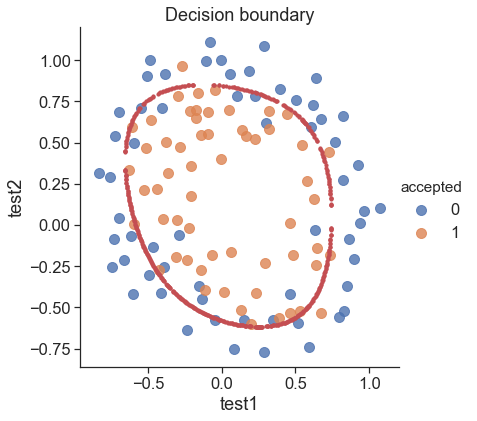

In [37]:
draw_boundary(power=6, l=1)#lambda=1

C:\Users\xyz_p\Miniconda3\envs\trafficsign\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  from ipykernel import kernelapp as app
C:\Users\xyz_p\Miniconda3\envs\trafficsign\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':
C:\Users\xyz_p\Miniconda3\envs\trafficsign\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


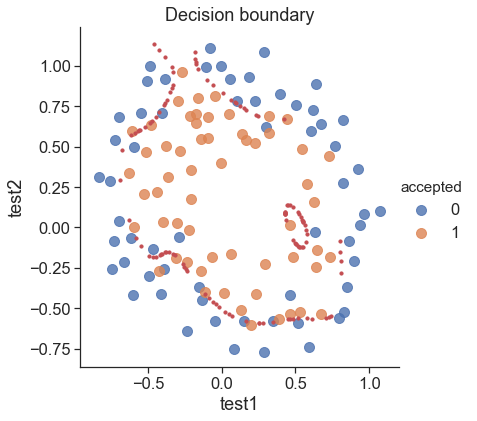

In [38]:
draw_boundary(power=6, l=0)#lambda=0

C:\Users\xyz_p\Miniconda3\envs\trafficsign\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  from ipykernel import kernelapp as app
C:\Users\xyz_p\Miniconda3\envs\trafficsign\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':
C:\Users\xyz_p\Miniconda3\envs\trafficsign\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


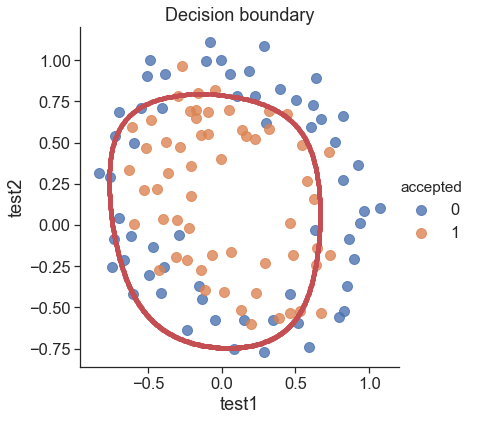

In [39]:
draw_boundary(power=6, l=10)#lambda=10

Can you tell the difference of the decision boundary with different lambda value?